# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [3]:
train_dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

val_dataset = get_dataset("/home/workspace/data/val/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10


In [7]:
train_dataset

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [8]:
def display_images(batch):
    # TODO - Your implementation here
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    color_coding = {1:'red', 2:'blue', 4:'green'}
    
    image = batch['image'].numpy()
    ax.imshow(image)
    
    width, height, c = batch['image'].shape
    
    for box, cls in zip(batch['groundtruth_boxes'].numpy(),batch['groundtruth_classes'].numpy()):
        y1, x1, y2, x2 = box 
        rec = patches.Rectangle((x1*width,y1*height), (x2-x1)*width, (y2-y1)*height, 
                                           edgecolor=color_coding[cls], facecolor = 'none')
        ax.add_patch(rec)
    pass

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

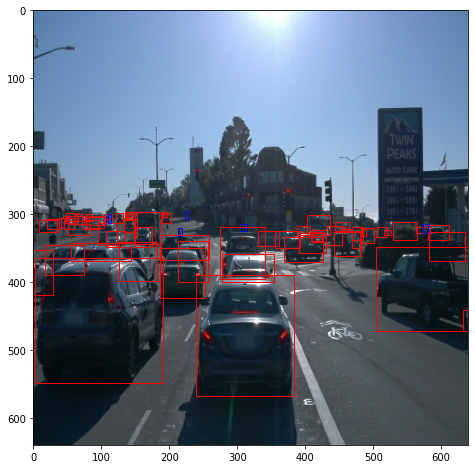

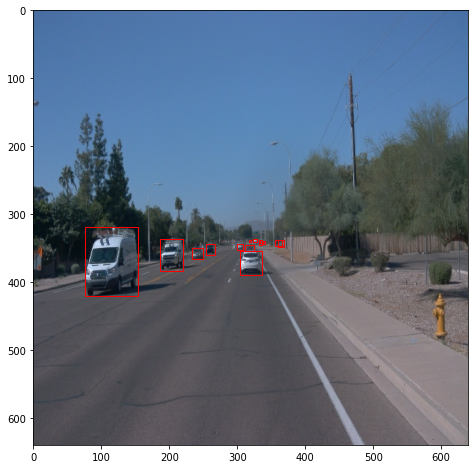

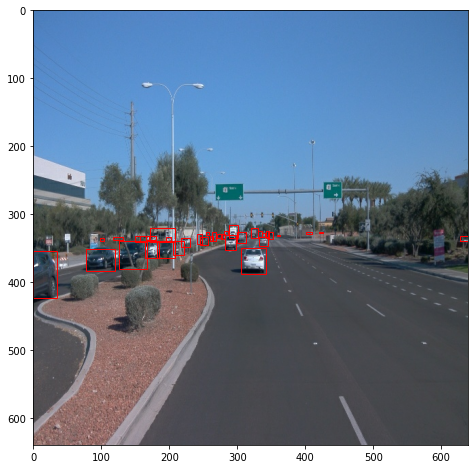

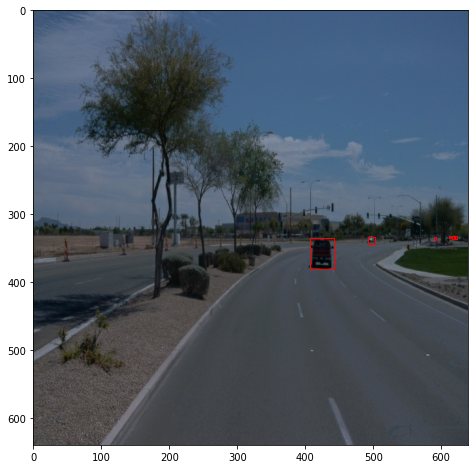

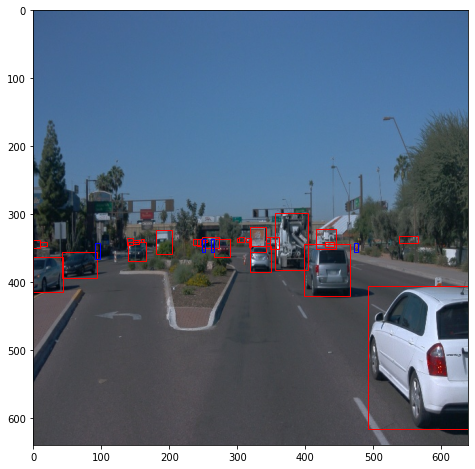

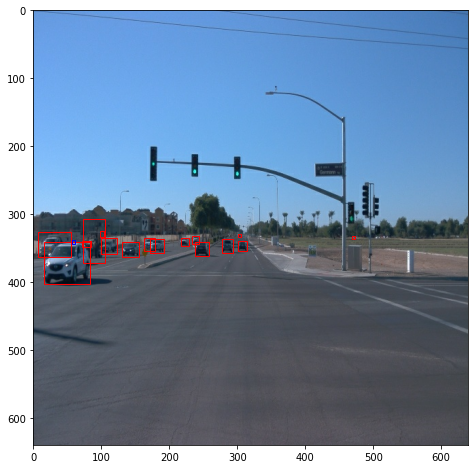

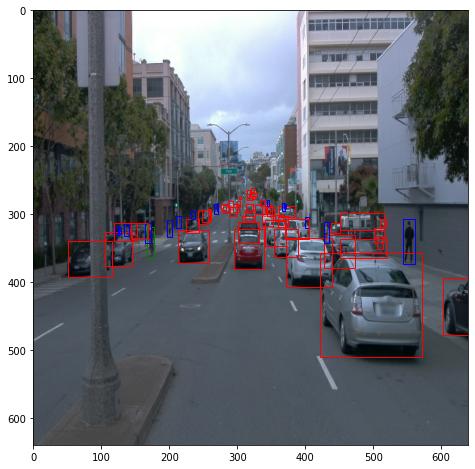

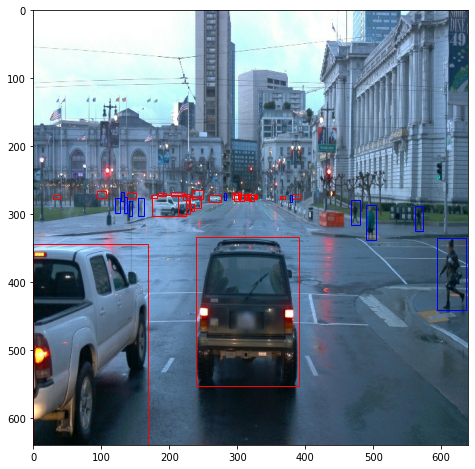

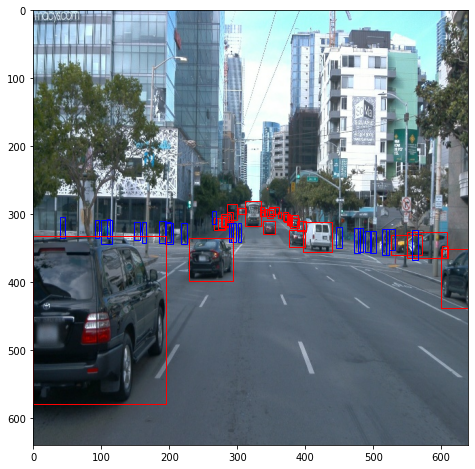

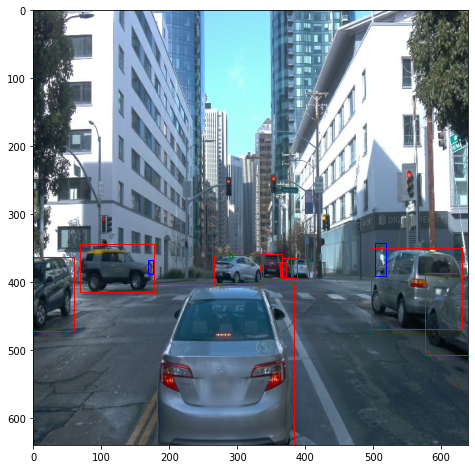

In [9]:
# Display 10 random images in dataset
for img in train_dataset.shuffle(100).take(5):
    display_images(img)
    
for i in val_dataset.shuffle(100).take(5):
    display_images(i)


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [14]:
def generate_class_dist(dataset):
    '''given a dataset, returns the distribution of different classes
    
    input-
    dataset: training or validation part of the waymo dataset
    
    output-
    count_per_class: dictionary containing the number of images per class
    '''
    count_per_class = {1:0, 2:0, 4:0}
    for images in dataset.take(7000):
        cls = images['groundtruth_classes'].numpy()
        for cl in cls:
            count_per_class[cl] += 1
            
    return count_per_class
    

In [16]:
train_class_dist = generate_class_dist(train_dataset)

print('class distribution of 7000 images in the training dataset:',train_class_dist)

val_class_dist = generate_class_dist(val_dataset)

print('class distribution of 7000 images in the validation dataset:',val_class_dist)

class distribution of 7000 images in the training dataset: {1: 121460, 2: 34181, 4: 897}
class distribution of 7000 images in the validation dataset: {1: 175124, 2: 73102, 4: 1968}


Text(0.5, 0, 'Distribution of different objects in 7000 training images')

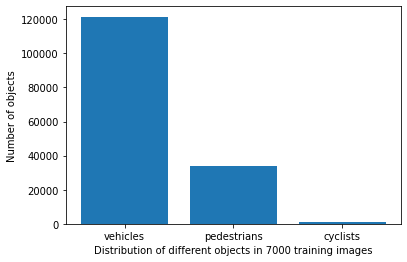

In [18]:
object_categories = ['vehicles','pedestrians','cyclists']

plt.bar(object_categories, train_class_dist.values())
plt.ylabel('Number of objects')
plt.xlabel('Distribution of different objects in 7000 training images')

Text(0.5, 0, 'Distribution of different objects in 7000 validation images')

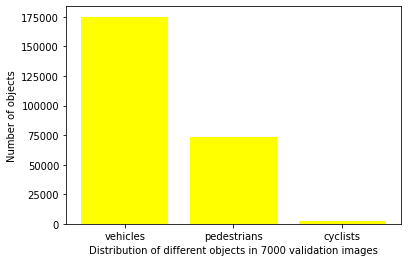

In [19]:
plt.bar(object_categories, val_class_dist.values(), color = 'yellow')
plt.ylabel('Number of objects')
plt.xlabel('Distribution of different objects in 7000 validation images')